<a href="https://colab.research.google.com/github/rizwan08-bit/rizwan08/blob/main/Work_on_Titanic_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Titanic-Dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]>

In [ ]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Checking for Outliers

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


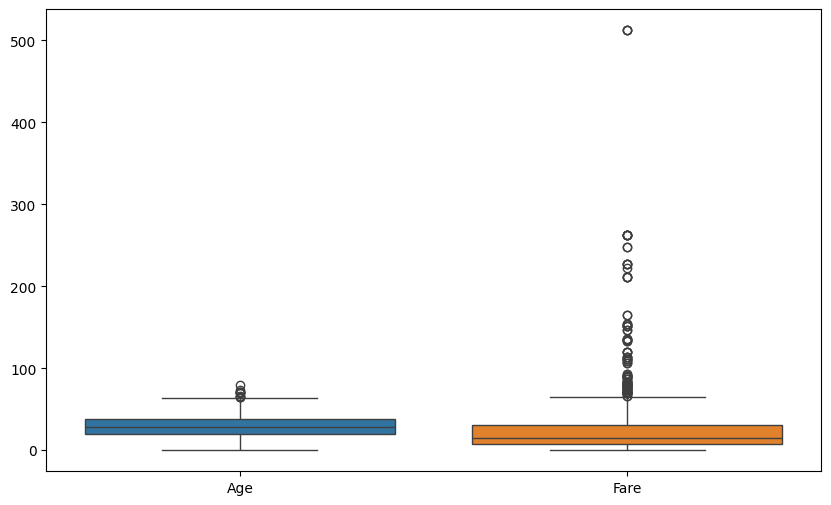

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Age', 'Fare']])
plt.show()

Checking for Class Imbalance

Survived
0    549
1    342
Name: count, dtype: int64


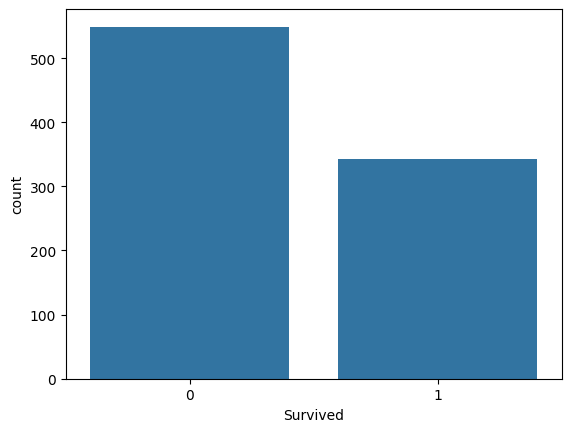

In [ ]:
print(df['Survived'].value_counts())
sns.countplot(x=df['Survived'])
plt.show()

mean median mod

In [ ]:
numerical_columns = ['Age', 'Fare', 'Survived']

for col in numerical_columns:
    print(f"--- {col} ---")
    print(f"Mean: {df[col].mean()}")
    print(f"Median: {df[col].median()}")
    print(f"Mode: {df[col].mode()[0]}\n")

--- Age ---
Mean: 29.69911764705882
Median: 28.0
Mode: 24.0

--- Fare ---
Mean: 32.204207968574636
Median: 14.4542
Mode: 8.05

--- Survived ---
Mean: 0.3838383838383838
Median: 0.0
Mode: 0



Identify Numerical Features

In [ ]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numerical Features:", numerical_features)

Numerical Features: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [ ]:
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical Features:", categorical_features)

Categorical Features: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


**Data visualisation**

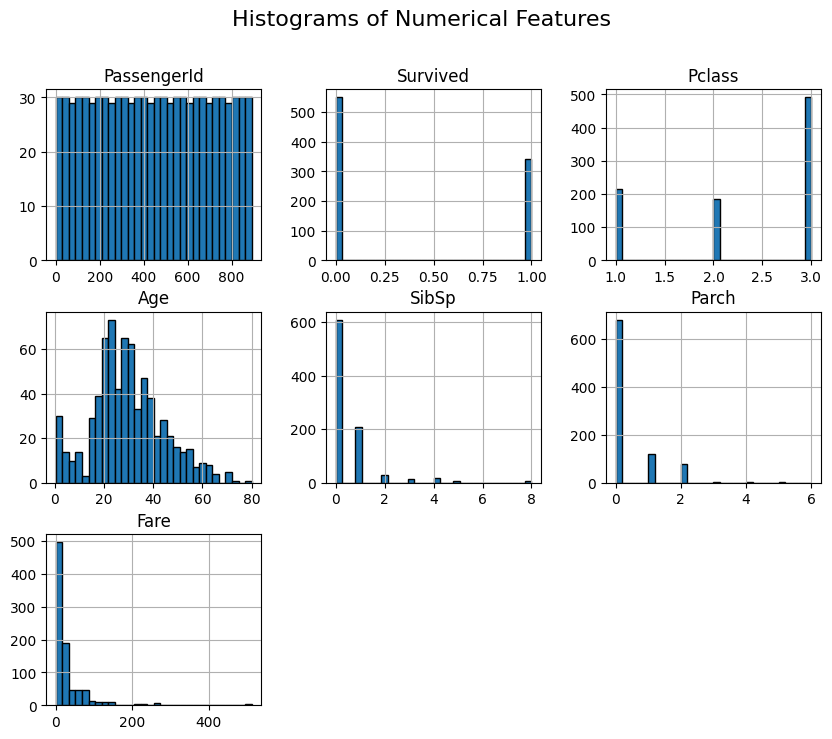

In [ ]:
df.hist(figsize=(10, 8), bins=30, edgecolor='black')
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.show()

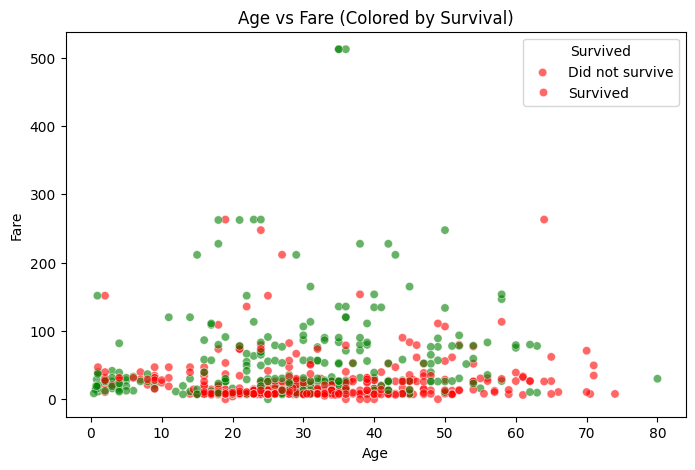

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Age'], y=df['Fare'], hue=df['Survived'], alpha=0.6, palette={0: "red", 1: "green"})
plt.title("Age vs Fare (Colored by Survival)")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.legend(title="Survived", labels=["Did not survive", "Survived"])
plt.show()

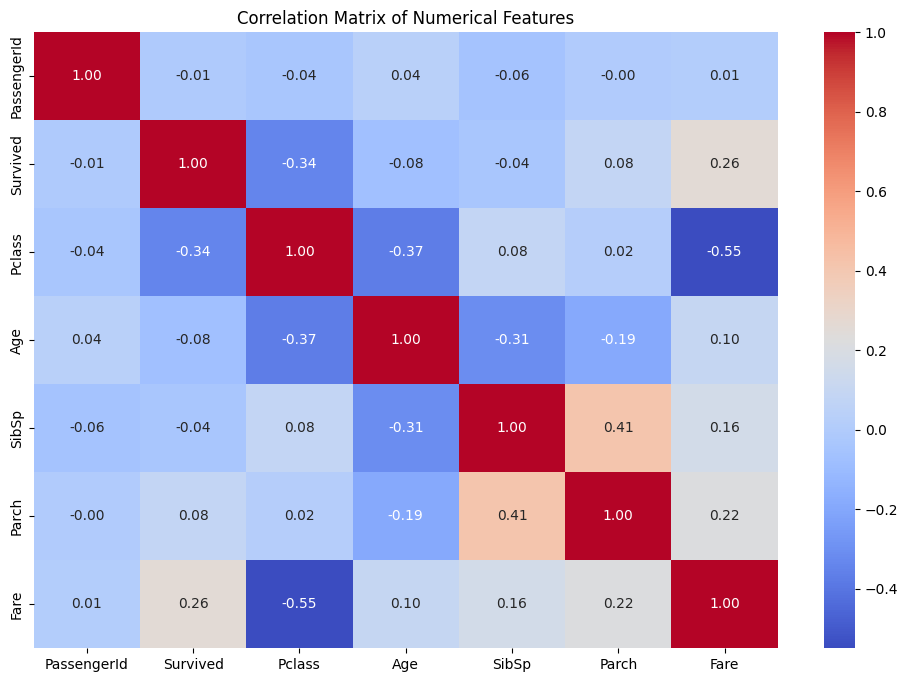

In [ ]:

numerical_features = df.select_dtypes(include=['number']).columns
correlation_matrix = df[numerical_features].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()


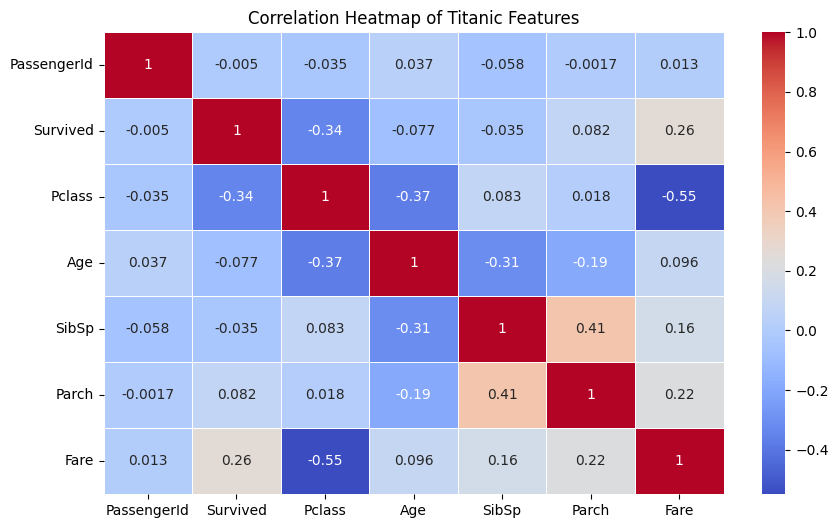

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Titanic Features")
plt.show()

**Task 2 **
Data preprocessing


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

df = pd.read_csv("/content/drive/MyDrive/Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(columns=['Cabin', 'Ticket', 'Name'], inplace=True)

<ipython-input-23-880bb3bc6351>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-23-880bb3bc6351>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [ ]:
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print(f"Training Set: {X_train.shape}, Validation Set: {X_val.shape}, Test Set: {X_test.shape}")


Training Set: (623, 8), Validation Set: (134, 8), Test Set: (134, 8)


In [ ]:

numerical_features = ['Age', 'Fare', 'SibSp', 'Parch']
categorical_features = ['Sex', 'Embarked']


num_pipeline = Pipeline([
    ('scaler', MinMaxScaler())
])

cat_pipeline = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])


preprocessor = ColumnTransformer([
    ('num', num_pipeline, numerical_features),
    ('cat', cat_pipeline, categorical_features)
])


In [ ]:

X_train = preprocessor.fit_transform(X_train)


X_val = preprocessor.transform(X_val)
X_test = preprocessor.transform(X_test)


task 3
Model building and performance evaluation


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


Optimal K: 11


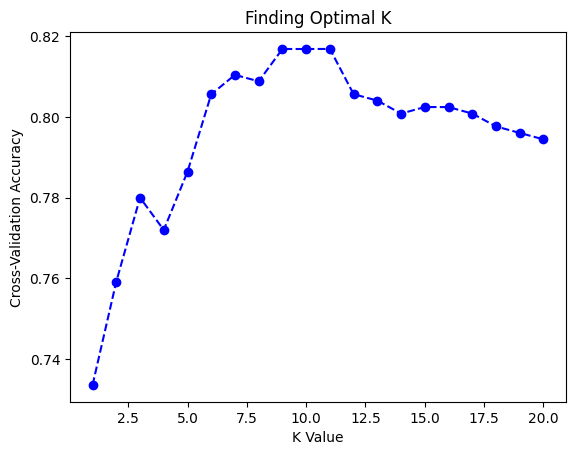

In [ ]:

k_values = list(range(1, 21))
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')  # 5-fold cross-validation
    cv_scores.append(scores.mean())


optimal_k = k_values[np.argmax(cv_scores)]
print(f"Optimal K: {optimal_k}")


plt.plot(k_values, cv_scores, marker='o', linestyle='dashed', color='b')
plt.xlabel("K Value")
plt.ylabel("Cross-Validation Accuracy")
plt.title("Finding Optimal K")
plt.show()


In [ ]:
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [ ]:

y_pred = knn.predict(X_val)


accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)


print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.8507
Precision: 0.8333
Recall: 0.7692
F1 Score: 0.8000


In [ ]:

y_test_pred = knn.predict(X_test)


test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("\nFinal Model Performance on Test Set:")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")



Final Model Performance on Test Set:
Test Accuracy: 0.7761
Test Precision: 0.7234
Test Recall: 0.6667
Test F1 Score: 0.6939


comparing


In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_val)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_val)


In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_val)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#
y_pred_knn = knn.predict(X_val)

def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"\n📊 {model_name} Performance:")
    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1 Score:  {f1:.4f}")
    return [accuracy, precision, recall, f1]


knn_results = evaluate_model(y_val, y_pred_knn, "KNN")  # Now y_pred_knn is defined
log_reg_results = evaluate_model(y_val, y_pred_log, "Logistic Regression")
rf_results = evaluate_model(y_val, y_pred_rf, "Random Forest")
svm_results = evaluate_model(y_val, y_pred_svm, "SVM")


📊 KNN Performance:
Accuracy:  0.8507
Precision: 0.8333
Recall:    0.7692
F1 Score:  0.8000

📊 Logistic Regression Performance:
Accuracy:  0.8209
Precision: 0.7917
Recall:    0.7308
F1 Score:  0.7600

📊 Random Forest Performance:
Accuracy:  0.8060
Precision: 0.7826
Recall:    0.6923
F1 Score:  0.7347

📊 SVM Performance:
Accuracy:  0.8134
Precision: 0.7755
Recall:    0.7308
F1 Score:  0.7525


**Evaluation**

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n📊 {model_name} - Classification Report:\n")
    print(classification_report(y_true, y_pred))


    cm = confusion_matrix(y_true, y_pred)


    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Survived", "Survived"], yticklabels=["Not Survived", "Survived"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()



📊 K-Nearest Neighbors - Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.90      0.88        82
           1       0.83      0.77      0.80        52

    accuracy                           0.85       134
   macro avg       0.85      0.84      0.84       134
weighted avg       0.85      0.85      0.85       134



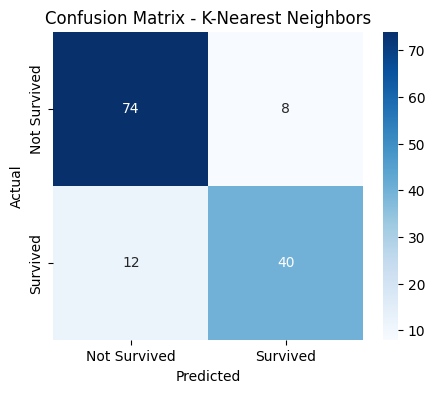


📊 Logistic Regression - Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.88      0.86        82
           1       0.79      0.73      0.76        52

    accuracy                           0.82       134
   macro avg       0.81      0.80      0.81       134
weighted avg       0.82      0.82      0.82       134



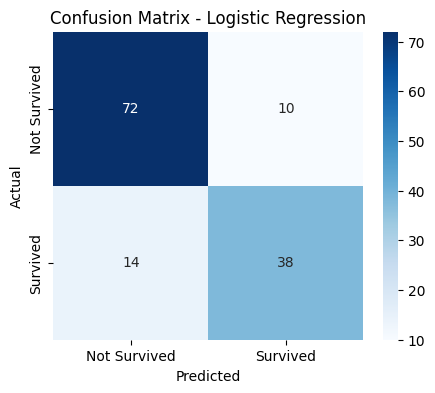


📊 Random Forest - Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.88      0.85        82
           1       0.78      0.69      0.73        52

    accuracy                           0.81       134
   macro avg       0.80      0.79      0.79       134
weighted avg       0.80      0.81      0.80       134



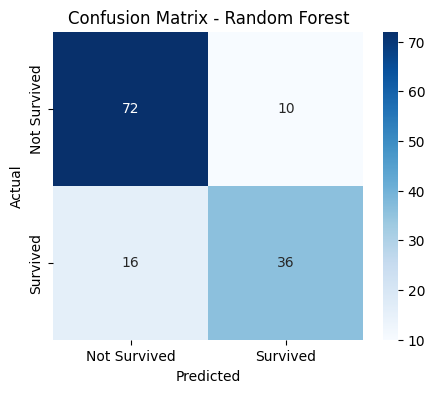


📊 Support Vector Machine (SVM) - Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.87      0.85        82
           1       0.78      0.73      0.75        52

    accuracy                           0.81       134
   macro avg       0.81      0.80      0.80       134
weighted avg       0.81      0.81      0.81       134



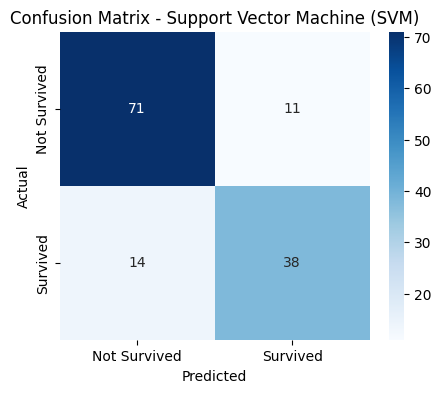

In [ ]:

evaluate_model(y_val, y_pred_knn, "K-Nearest Neighbors")

evaluate_model(y_val, y_pred_log, "Logistic Regression")

evaluate_model(y_val, y_pred_rf, "Random Forest")

evaluate_model(y_val, y_pred_svm, "Support Vector Machine (SVM)")
